In [497]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm

In [498]:
data=pd.read_csv("D://Training_Projects//SentimentAnalysis//archive//Tweets.csv")
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [499]:
data['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [500]:
data['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [501]:
data['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [502]:
data['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 832, dtype: int64

In [503]:
#There are three columns that are not very useful, negativereason_gold, airline_sentiment_gold, retweet_count and tweet_coord.
# some of them have a large number of unmeaningful values. For example, in 'retweet_count' 13873 rows out of 14640 rows have a value 0.
#We have also dropped tweet_location, tweet_created, user_timezone and name as these pieces of data will not contribute to our analysis.
data.drop('negativereason_gold', axis=1, inplace=True)
data.drop('airline_sentiment_gold', axis=1, inplace=True)
data.drop('retweet_count', axis=1, inplace=True)
data.drop('tweet_coord', axis=1, inplace=True)
data.drop('tweet_location', axis=1, inplace=True)
data.drop('tweet_created', axis=1, inplace=True)
data.drop('user_timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
# Check the current list of columns

list(data.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

In [504]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')
english_stopwords=stopwords.words('english')
print(english_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [505]:
def clean_text(str_in):
    """Remove special characters, @airline/username, empty string and
    unmeaningful words from the original text.
    Returns:
        A string similar to the input string, but it does not have
        special characters, @airline, empty word, or any unmeaningful
        words listed above. For example:

        "thanks"
    """
    res = ""
    str_input = str_in.lower()
    str_array  = str_in.split(' ')
    for word in str_array:
        # make all words into lower case
        word = word.lower()
        # remove not useful words from the original text
        if '@' in word or word == '' or word[:1] == '&':
            continue
        if word.lower() in english_stopwords:
            continue
        if word.isnumeric():
            continue
        res = res + " " + word
    return res

In [506]:
data['text']=data['text'].apply(clean_text)


In [507]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,said.
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,plus added commercials experience... tacky.
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,today... must mean need take another trip!
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,"really aggressive blast obnoxious ""entertainm..."
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,really big bad thing


#  Count the neutral, positive and negative comments.

In [508]:
sentiments=data['airline_sentiment'].unique ()
#there we know there are 3 types only
sentiments

array(['neutral', 'positive', 'negative'], dtype=object)

In [509]:
total_positive = data[data['airline_sentiment'] == 'positive']['airline_sentiment_confidence'].sum()
total_neutral = data[data['airline_sentiment'] == 'neutral']['airline_sentiment_confidence'].sum()
total_negative = data[data['airline_sentiment'] == 'negative']['airline_sentiment_confidence'].sum()

values = [total_positive, total_neutral,total_negative]
dictionary1 = {'Airline Sentiment':sentiments, 'Count':values} 

data_SentimentCount = pd.DataFrame(dictionary1)
data_SentimentCount.head(3)

,Airline Sentiment,Count
0,neutral,2060.6280
1,positive,2551.4171
2,negative,8566.4269


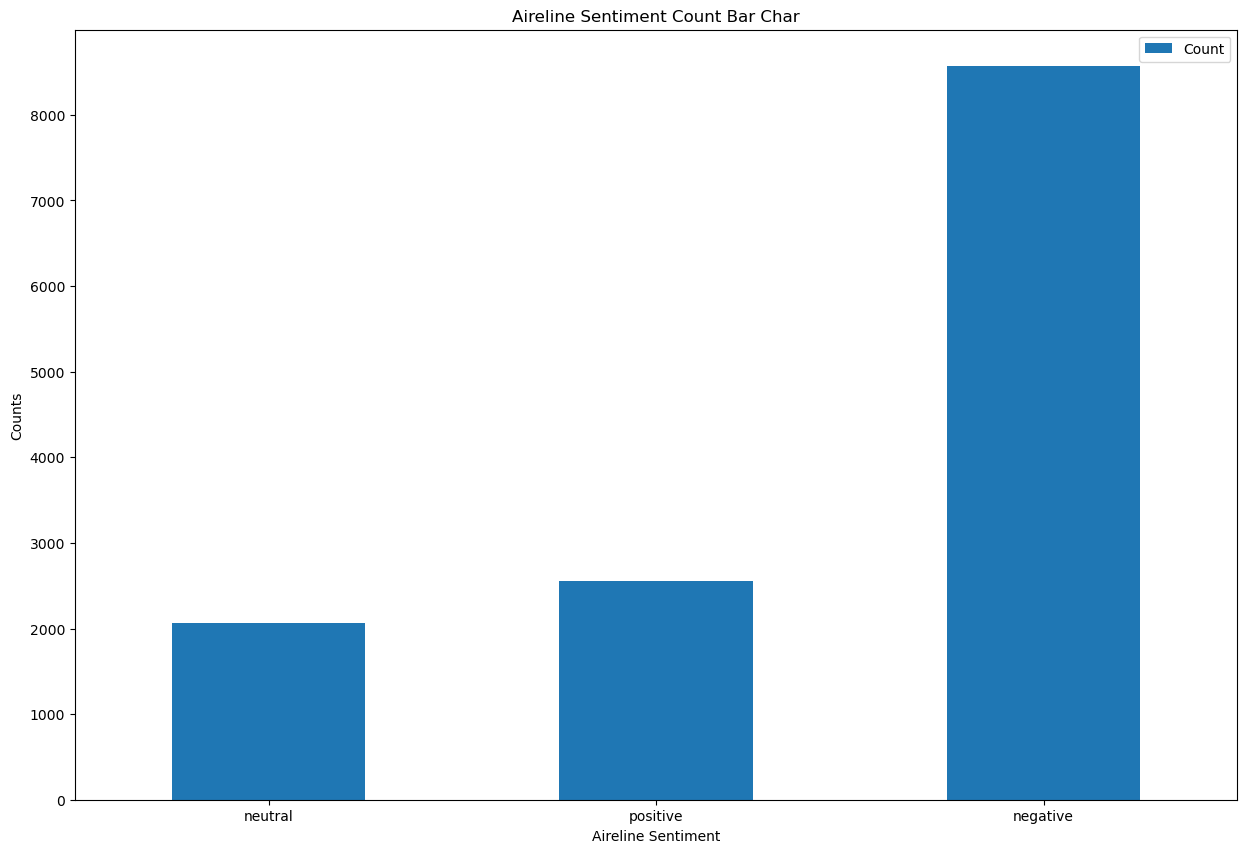

In [510]:
visualize=data_SentimentCount.plot.bar(x='Airline Sentiment', y='Count', rot=0, figsize=(15,10))
#Add title ans axis names
plt.title('Aireline Sentiment Count Bar Char')
plt.xlabel('Aireline Sentiment')
plt.ylabel('Counts')
#show graphics
plt.show()


1- gather the neutral, positive and negative count for every airline 
2 -getting the total count of the feedback in terms of sentiment confidence per airline.

In [511]:
All_Airlines = data['airline'].unique()
All_Airlines

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [512]:
neutralCount =[]
positiveCount =[]
negativeCount=[]
totalCount =[]

for airline in All_Airlines:
    neuC =data.query("airline ==@airline and  airline_sentiment =='neutral'")['airline_sentiment_confidence'].sum()
    posC =data.query("airline ==@airline and  airline_sentiment =='positive'")['airline_sentiment_confidence'].sum()
    negC =data.query("airline ==@airline and  airline_sentiment =='negative'")['airline_sentiment_confidence'].sum()
    tot=neuC+posC+negC
    neutralCount.append(neuC)
    positiveCount.append(posC)
    negativeCount.append(negC)
    totalCount.append(total)

data_SentimentCount2=pd.DataFrame(index=All_Airlines)
data_SentimentCount2['Neutral Count']=neutralCount
data_SentimentCount2['PositiveCount ']=positiveCount
data_SentimentCount2['Negative Count']=negativeCount
data_SentimentCount2

,Neutral Count,PositiveCount,Negative Count
Virgin America,143.3610,134.9727,163.2137
United,564.4000,421.1578,2457.5967
Southwest,548.5365,505.0800,1091.7521
Delta,599.5580,471.7084,861.6031
US Airways,313.1524,231.2555,2140.1501
American,382.4092,296.4536,1852.1112


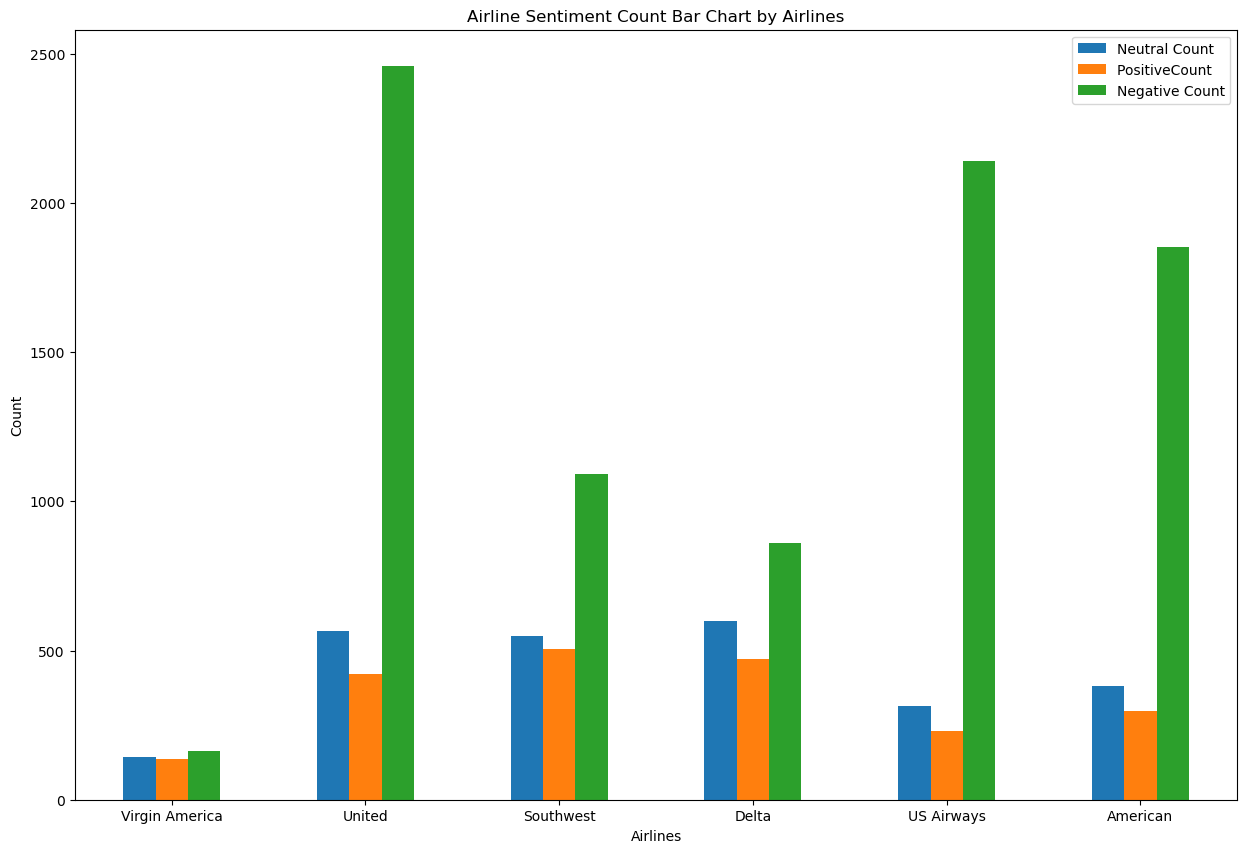

In [513]:
plt2=data_SentimentCount2.plot.bar(rot=0,figsize=(15,10))
#know sentiment for each airline
# Add title and axis names
plt.title('Airline Sentiment Count Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Count')
 
# Show graphic
plt.show()

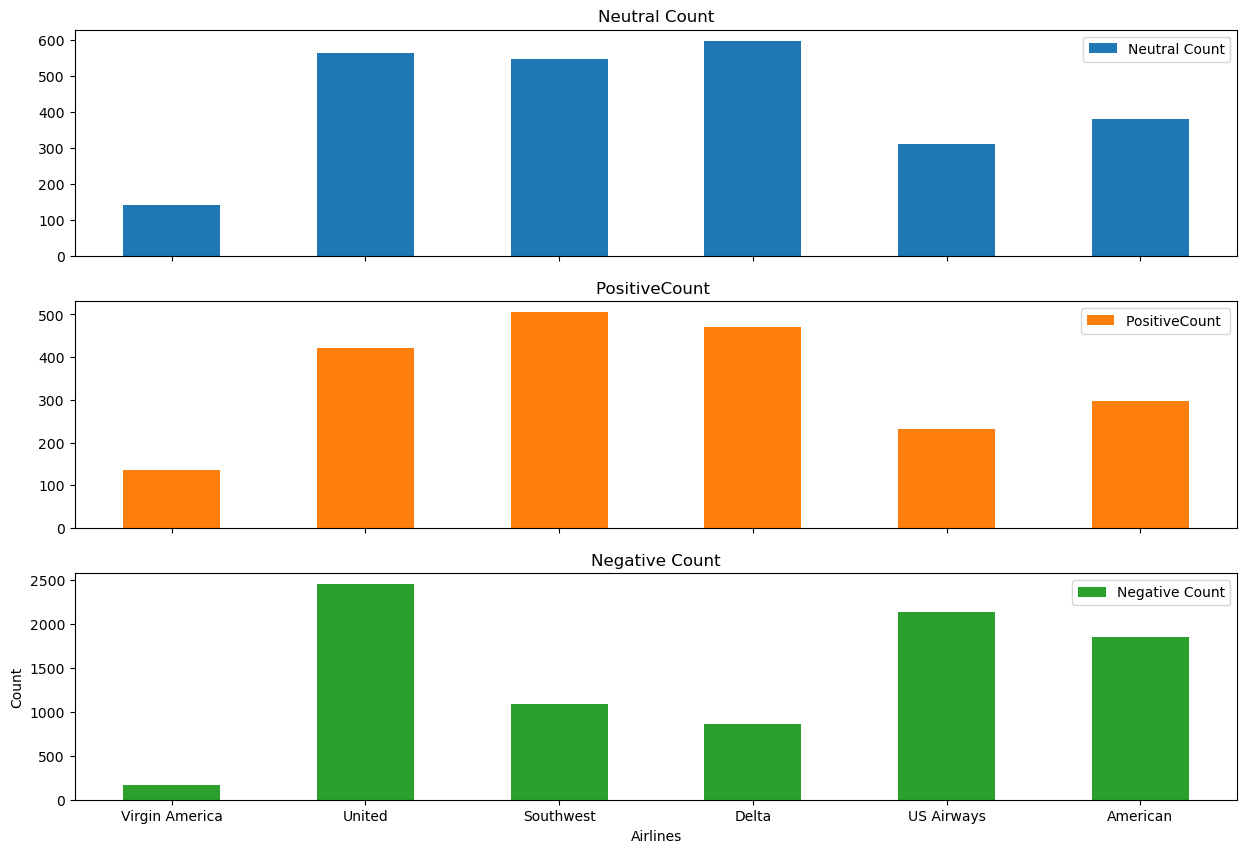

In [514]:
# know how neutral count, positive count and negative count seperately

plt3 = data_SentimentCount2.plot.bar(rot=0, subplots=True, figsize=(15,10))

# Add axis names
plt.xlabel('Airlines')
plt.ylabel('Count')
# Show graphic
plt.show()

 we calculate the percentage of feedback that is negative with the total amount calculated, Then we can make a more fair comparison. 

In [462]:
percentNeg=[]
for neg ,tot in zip(negativeCount,totalCount):
    perc =neg/tot
    percentNeg.append(perc)
    
data_SentimentCount3=pd.DataFrame(index=All_Airlines)
data_SentimentCount3['Negative Feedback %'] = percentNeg
data_SentimentCount3

,Negative Feedback %
Virgin America,0.064487
United,0.971008
Southwest,0.431357
Delta,0.340424
US Airways,0.845584
American,0.731778


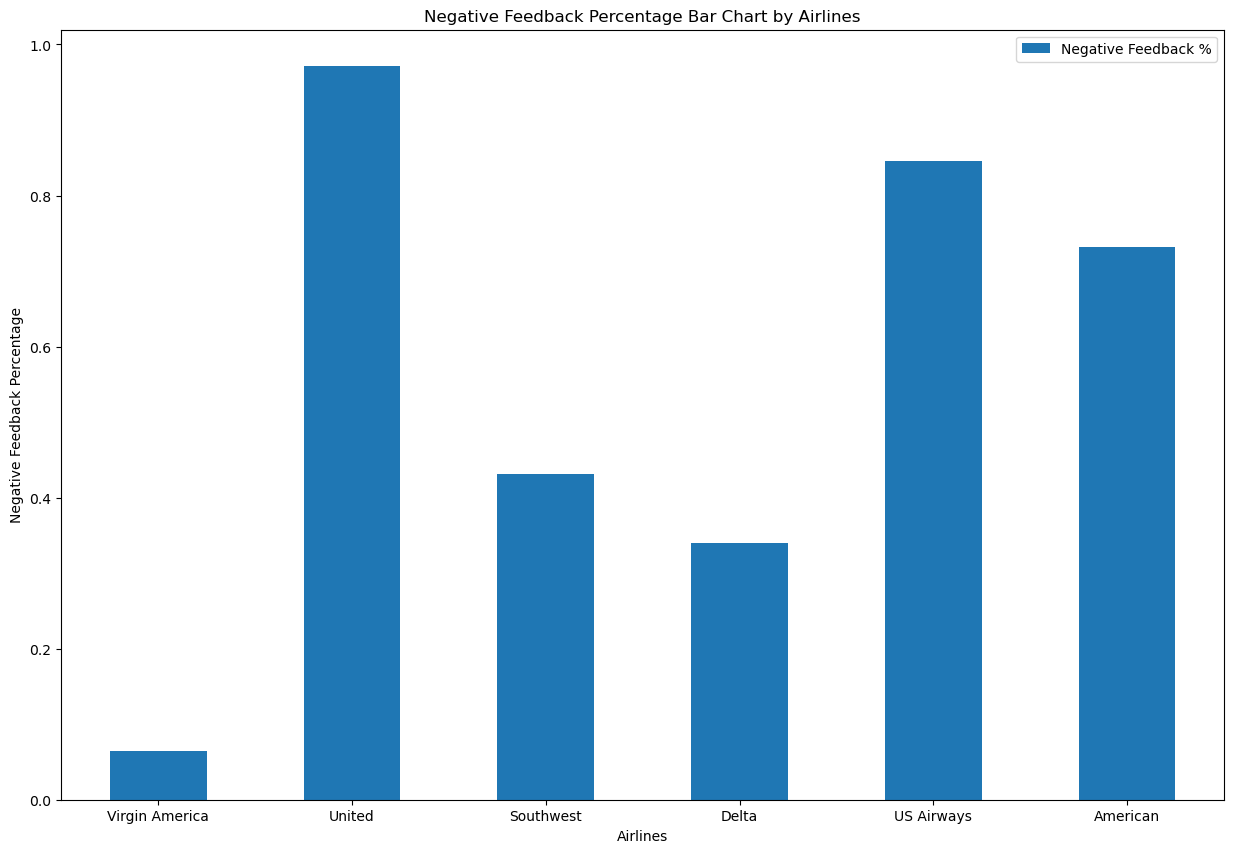

In [463]:
plt4 = data_SentimentCount3.plot.bar(rot=0, figsize=(15,10))

# Add axis names
plt.title('Negative Feedback Percentage Bar Chart by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Negative Feedback Percentage')
 
# Show graphic
plt.show()

# words are the most prevalent, for all positive feedbacks, neutral feedbacks, and negative feedbacks

In [464]:
#get 3 lists of text based on their airline sentiment types
negative_text=data[data['airline_sentiment']=='negative']['text']
positive_text=data[data['airline_sentiment']=='positive']['text']
neutral_text=data[data['airline_sentiment']=='neutral']['text']

In [465]:
# count frequency for all three lists
#have a function `count_words` to count word frequencies in the input list and return its corresponding frequency dictionar

In [466]:
def count_words(texts):
    result = {}
    for text in texts:
        text_arr = text.split(' ')#Each text is split into individual words using the split(' ') method, which splits the text whenever it encounters a space character.
        for word in text_arr:
            # exclude empty string
            if word == '':#checks if it's an empty string. If it is, it skips to the next word.
                continue
            # increase the frequency count in the returning dict
            if word in result:#If the word is already in the dictionary (result), its count is incremented by 1. If the word is not in the dictionary, it's added with an initial count of 1.
                count = result[word]
                result[word] = count + 1
            else:
                result[word] = 1
    return result

In [467]:
#get the frequency dictionary using the text lists we specified before.  
negative_dict = count_words(negative_text)
neutral_dict = count_words(neutral_text)
positive_dict = count_words(positive_text)

In [468]:
#sort the dictionary based on frequency
import operator
sorted_negative_dic = sorted(negative_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_neutral_dict = sorted(neutral_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_positive_dict = sorted(positive_dict.items(), key=operator.itemgetter(1), reverse=True)

In [489]:
# convert dictionaries to dataframes
negative_df=pd.DataFrame(sorted_negative_dic,columns=['word','Frequency'])
negative_df

,word,Frequency
0,flight,2390
1,get,980
2,cancelled,911
3,customer,571
4,service,541
...,...,...
17918,answers!,1
17919,"play,",1
17920,delays👌,1
17921,phones!,1


In [490]:
# convert dictionaries to dataframes
positive_df=pd.DataFrame(sorted_positive_dict,columns=['word','Frequency'])
positive_df

,word,Frequency
0,thank,452
1,thanks,397
2,flight,305
3,great,193
4,you!,134
...,...,...
6291,http://t.co/drw08djhai,1
6292,relations,1
6293,concerns,1
6294,"directly,",1


In [491]:
# convert dictionaries to dataframes
neutral_df=pd.DataFrame(sorted_neutral_dict,columns=['word','Frequency'])
neutral_df

,word,Frequency
0,flight,519
1,get,237
2,-,171
3,need,159
4,please,146
...,...,...
8091,share.,1
8092,"george,",1
8093,process:,1
8094,http://t.co/4gr39s91dl”😂,1


# visualize  the most frequent word in 3 types of sentiment

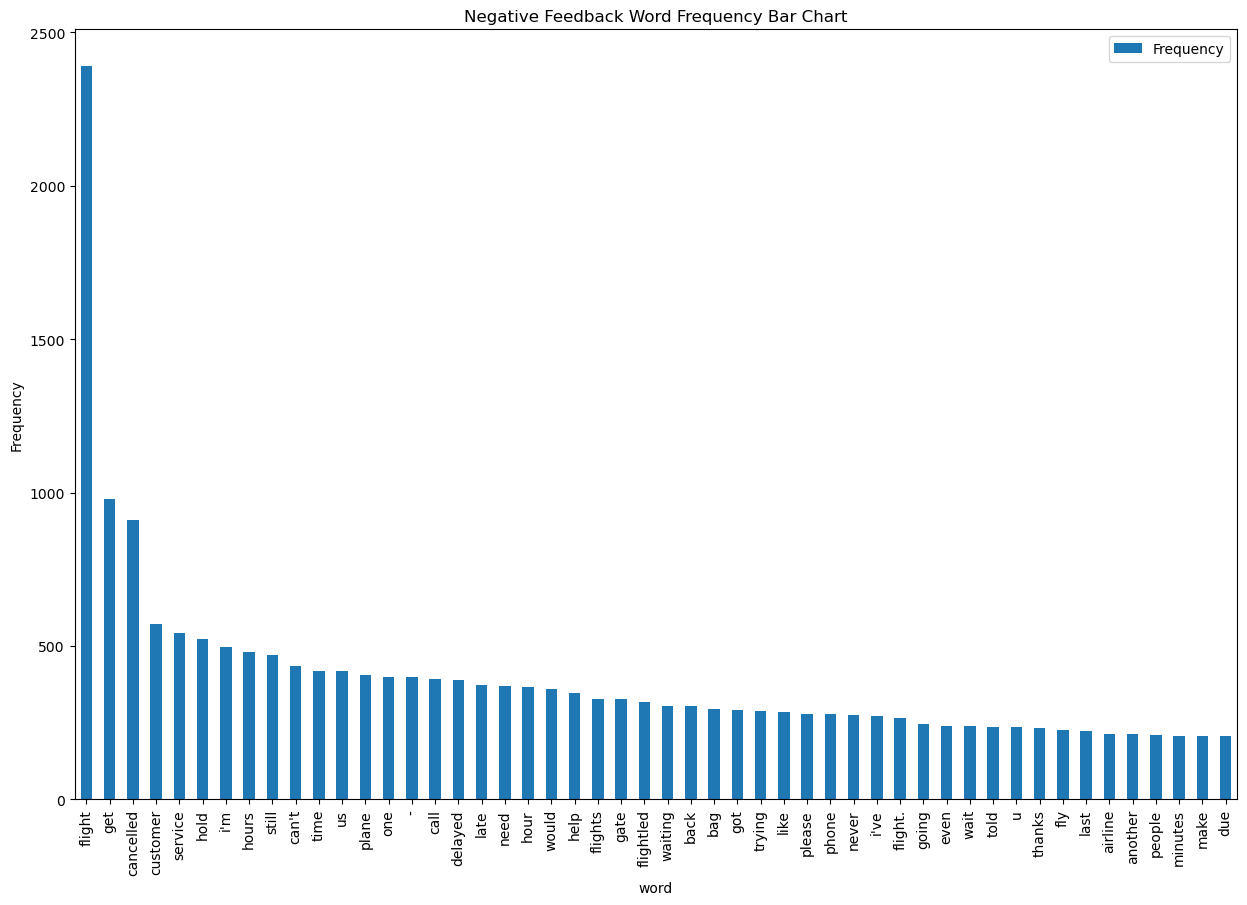

In [492]:
negative_df.set_index('word')#'Word'. This means that the 'Word' column will become the index of the DataFrame instead of the default numeric index.
plt5 = negative_df.head(50).plot.bar( x='word', y='Frequency',figsize=(15,10))
#we can see the top 50 most frequent words for negative
# Add title and axis names
plt.title('Negative Feedback Word Frequency Bar Chart')
plt.xlabel('word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()

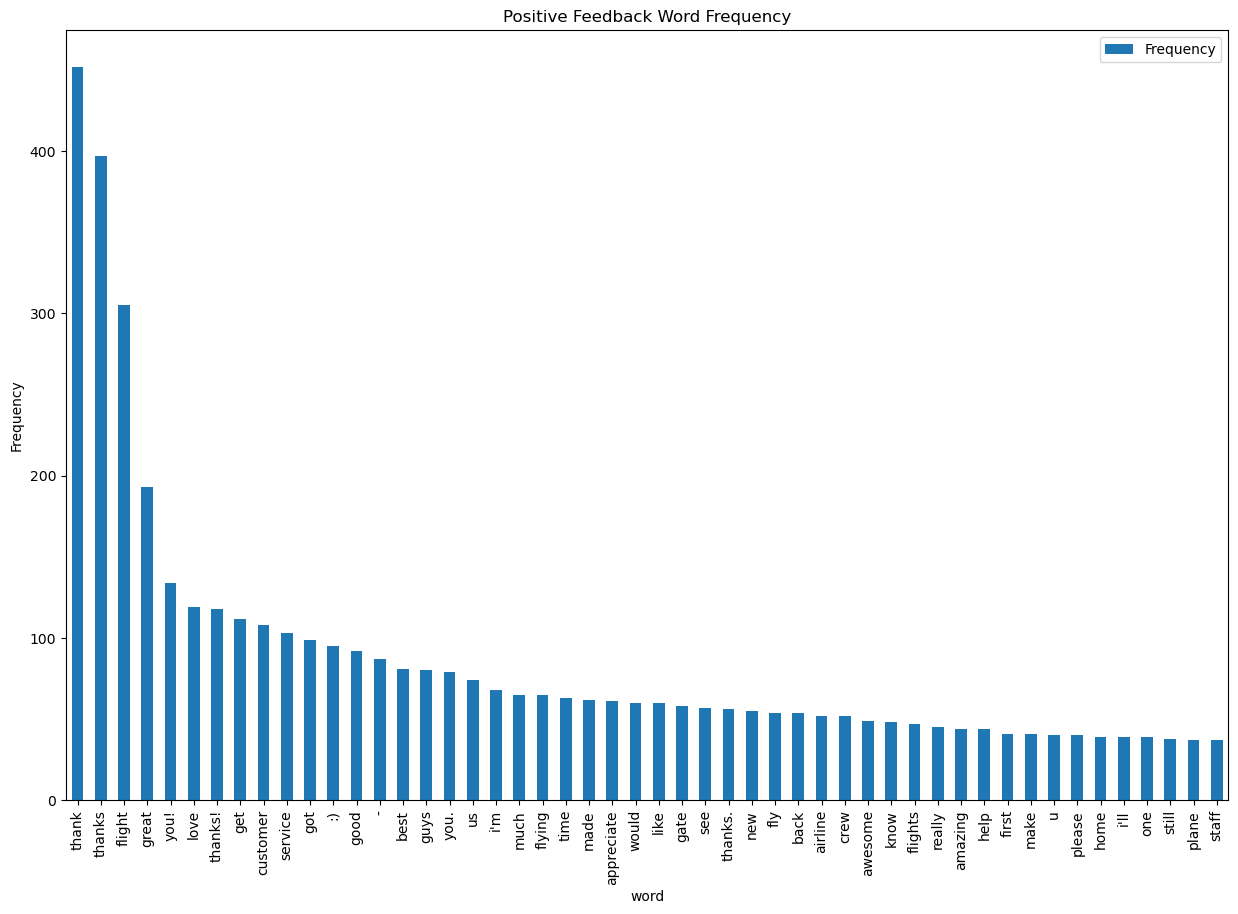

In [493]:
positive_df.set_index('word')
plt6=positive_df.head(50).plot.bar(figsize=(15,10),x='word', y='Frequency')
plt.title("Positive Feedback Word Frequency")
plt.xlabel('word')
plt.ylabel('Frequency')
plt.show()

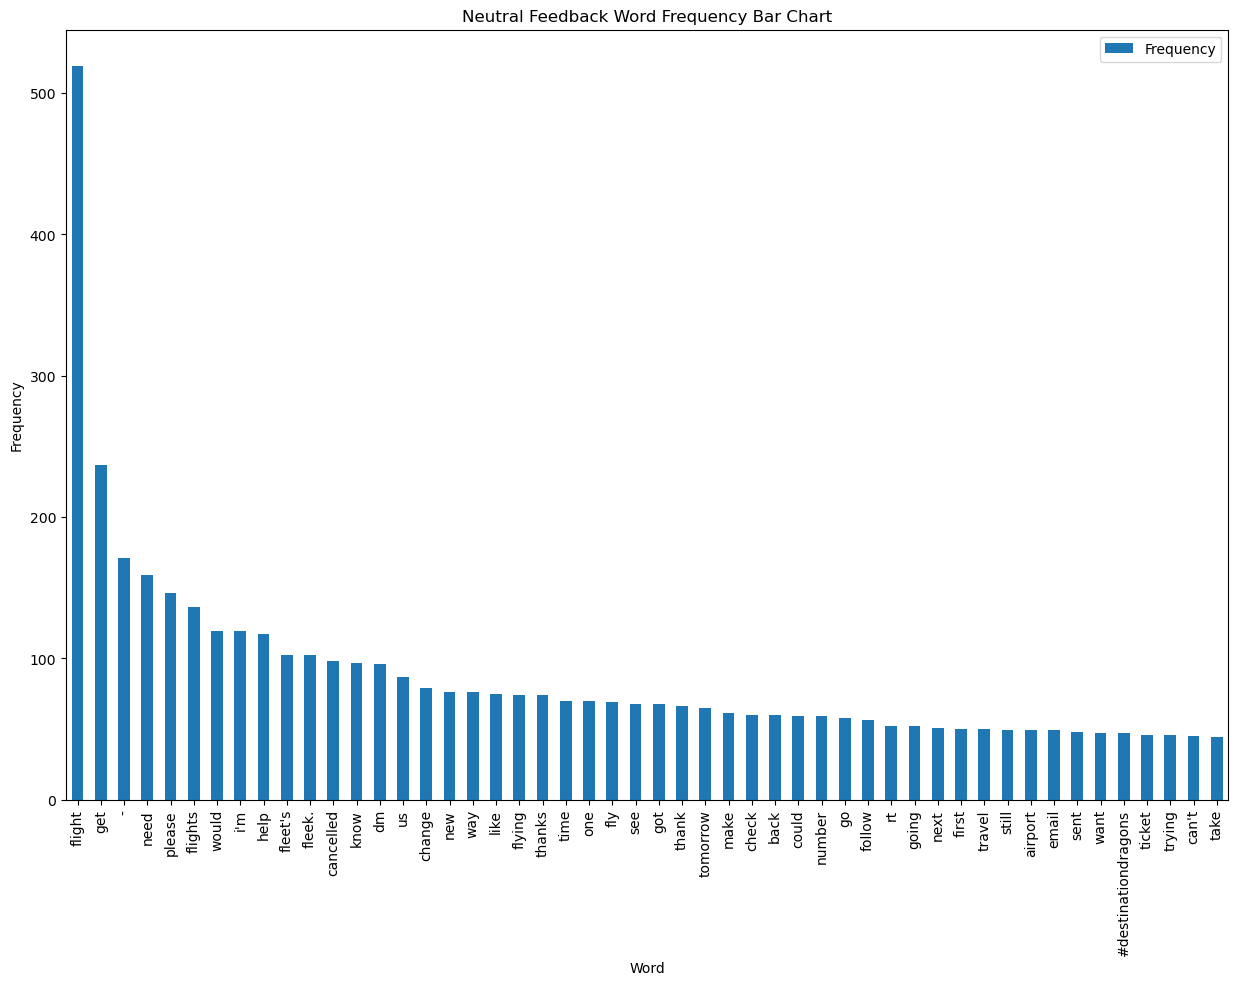

In [495]:
neutral_df.set_index('word')
plt6 = neutral_df.head(50).plot.bar(x='word', y='Frequency', figsize=(15,10))

# Add title and axis names
plt.title('Neutral Feedback Word Frequency Bar Chart')
plt.xlabel('Word')
plt.ylabel('Frequency')
 
# Show graphic
plt.show()